<font color=darkred>

# Soc 220: Computational Text Methods

## Lab 10: Word Embeddings

***

<img src="images/camera.png" style="width: 600px"/>

***

1. XML files
2. word2vec: Skip-gram
3. word2vec: CBOW
4. doc2vec

***
***

### Data

- We never discussed XML.
- "Extensible Markup Language" (XML) encodes information that is both machine and human readable.
- Not that different from html.

In [1]:
#!pip3 install tqdm

In [2]:
#imports a progress bar on all our big functions
#from tqdm import tqdm
#tqdm.pandas(desc="progress-bar")

In [3]:
# get current working directory
import os
os.getcwd()

'/Users/zwehrwein/Dropbox/coursework/2018Spring/soc220_spring2018/soc220-labs-draft/Github_draft/lab10'

In [4]:
# define where the data is and change the working directory
ob_directory = '/Users/zwehrwein/Dropbox/research/obo_ordinaryaccounts'
os.chdir(ob_directory)
# check that we have the right data
os.getcwd()

'/Users/zwehrwein/Dropbox/research/obo_ordinaryaccounts'

In [5]:
# glob loads all files that fit a regular expression
import glob
# here i am asking for anything with .xml and printing the first files.
xml_files = glob.glob('*.xml')
print(xml_files[:5])

['OA17191106.xml', 'OA17441107.xml', 'OA17611005.xml', 'OA17150202.xml', 'OA17600915.xml']


In [6]:
# we use xml library like bs4
import xml.etree.ElementTree as et
# parse a random xml file
tree = et.parse(xml_files[5])
root = tree.getroot()

In [7]:
# sort for paragraphs and extract text
for par in root.iter('p'):
    print(par.text)
    print(type(par.text))

THE ORDINARY of NEWGATE his ACCOUNT, Of the Behaviour, Confession, and dying Words of the Malefactors, who were executed at Tyburn, on Tuesday the 12th, of this Instant May, 1730.
<class 'str'>
AT the King's Commission of Oyer and Terminer, and Gaol-Delivery of Newgate, held (before the 
<class 'str'>
Nine Men, viz. 
<class 'str'>
While under Sentence, they were instructed in the first Principles of Religion, both in Publick and Private: Some of them having been grossly Ignorant, (partly for want of Education, and partly by Reason of their obstinate and unadviseable Tempers) whether in natural or revealed Maxims. From St. John, 1. 12. 13. But as many as received him, to them gave he Power to become the Sons of God; even to them that believe on his Name: which were born, not of Blood, nor of the Will of the Flesh, nor of the Will of Man, but of God. I took Occasion to shew them the absolute Necessity of believing in Christ, as the Son of God, the true Messias, and only Saviour of lost M

In [8]:
len(xml_files)

475

In [9]:
# our aim is to have a list of the transcripts (as strings) of each trial.
# we'll also remove escape characters.

list_trial_full_texts = []

for file in xml_files:
    tree = et.parse(file)
    root = tree.getroot()
    
    list_trial_pars = []
    
    try:
        for par in root.iter('p'):
            list_trial_pars.append(par.text)
    except:
        pass
    
    full_trial = str(list_trial_pars)
    
    #remove escape characters
    full_trial_correct = corrected_text = full_trial.replace('\\n', ' ').replace('\r', '').replace('\t', '').replace("\\","").replace("-",'')
    
    list_trial_full_texts.append(full_trial_correct)

In [10]:
# datacheck that we looped through all of our texts
len(list_trial_full_texts)

475

In [11]:
# datacheck for type
type(list_trial_full_texts[0])

str

In [12]:
# datacheck to that we have the data that we want.
print(list_trial_full_texts[0][500:1000])

ation, I perceived, in most People whom I have since conversed with, of having a True and Genuine Relation of the last Dying Words and Actions of these Criminals, have, in a manner, forc’d from me (though at this distance of Time) this present Account.', 'ON Sunday, November the First, in the Afternoon, I Preached to the Prisoners on these Words, taken out of the Third Chapter of the Second Epistle General of St. Peter, and the Ninth Verse;', 'The Lord is not slack concerning his Promise (as som


***
***

<font color=purple>
### **word2vec works off "sentences" of tokens!** 

In [13]:
# NOW we create sentences.
# one could imagine splitting the corpus across time and then comparing how words changes.
from nltk.tokenize import sent_tokenize

list_all_sentences = []

for trial in list_trial_full_texts:
    
    #tokenize by sentences
    sents = sent_tokenize(trial)
    
    #use extend method to create a single dimensional list
    list_all_sentences.extend(sents)

In [14]:
# data check for length of all sentences
len(list_all_sentences)

41090

In [15]:
list_all_sentences[100:103]

['Whereupon he began to be a little more civil, and we told him at the same time, it was a Thing they never did in their Lives, go into a House with a strange Man, and that he may take it as a particular Favour; it being a very cold Night, we said, a Dram would warm us, or a Bowl of Punch, which was the very Reason we came with you.',
 "While we was talking, up comes the Landlady with the other Bowl of Punch; the Man ask'd our Landlady to drink a Glass, which she did, and drank to his good Health; and at the same time told him, he need not be any way uneasy in the Company he was in, for she could pass her Word they were as modest Girls as any in London, so Sir, I am your humble Servant.",
 'When the second Bowl of Punch was just out, we perceiv\'d he began to be very merry, and now we thought it was the most properest Time for our purpose; so I took my usual Method, with the Assistance of ", \'I and \', "I had not been down Stairs a Quarter of an Hour, but he called for another Tiff, w

In [16]:
# remove punctuation, but keep proper nouns
list_all_words_sents = []

from nltk.tokenize import word_tokenize
import re

for sent in list_all_sentences:
    
    #tokenize by word
    corrected_sent = word_tokenize(sent)
    
    #lower case
    corrected_sent = [word.lower() for word in corrected_sent]
    
    #removing punctuation
    corrected_sent = re.sub('[^A-Za-z0-9]+', ' ', str(corrected_sent))
    
    #split by ' ' to create a list of words
    corrected_sent = corrected_sent.split(' ')
    
    
    #save to outside list
    list_all_words_sents.append(corrected_sent)

In [17]:
list_all_words_sents[50:52]

[['',
  'they',
  'were',
  'told',
  'how',
  'great',
  'a',
  'crime',
  'it',
  'was',
  'to',
  'rob',
  'our',
  'neighbour',
  'how',
  'expressly',
  'contrary',
  'to',
  'the',
  'command',
  'of',
  'god',
  'and',
  'the',
  'laws',
  'of',
  'man',
  'and',
  'that',
  'the',
  'robber',
  'sooner',
  'or',
  'later',
  'will',
  'meet',
  'his',
  'reward',
  ''],
 ['',
  'they',
  'were',
  'also',
  'instructed',
  'in',
  'the',
  'nature',
  'end',
  'and',
  'design',
  'of',
  'the',
  'christian',
  'sacraments',
  'and',
  'were',
  'entreated',
  'truly',
  'to',
  'prepare',
  'themselves',
  'to',
  'receive',
  'the',
  'blessed',
  'sacrament',
  'of',
  'our',
  'lord',
  's',
  'last',
  'supper',
  '']]

In [18]:
# needs to be a list
type(list_all_words_sents[5])

list

<font color=darkblue>

#### Final data structure:

- **A list of all sentences, which are stored as lists of strings where each string is a word.**
- Each string is a sentence
- Punctuation has been remoed because estimating the "similarity" of "." is not interesting.

***
***

## Word Embeddings

- Words or phrases from vocabulary are mapped to vectors of reals.
- "Meaning" is inferred from context / relations. 
- word2vec is one popular algorithm for doing so.

### word2vec Intuition

- Developed by Google to efficiently represent text as a vector.
- Input to word2vec: text corpus (a list of strings)
- Output: vectors for each word
- use a large amount of text to create a high-dimensional representaitons of words capturing relationships between words unaided by external annotations.
- capture regularities in language games

**Wittgenstein (of the Philosophical Investigations) might be happy with this.**




Classic examples:

vec('Paris') - vec('France') + vec('Italy') = vec('Rome')

vec('King') - vec('Man') + vec('Woman') = vec('Queen')

https://www.technologyreview.com/s/541356/king-man-woman-queen-the-marvelous-mathematics-of-computational-linguistics/

***

<font color=black>


- *Topic models identify latenttopics within documents based on co-apperance of tokens.*

- *Word embeddings identify co-apperance of words in sentences to find equivalence and relation between words.*

<font color=darkgreen>
    
### Two ways to do word2vec: Continuous Bag of Words (CBOW) and Skip-Gram

<img src="images/cbow_sg_architecture.png" style="width: 600px"/>

<font color=black>

Excellent class notes from Stanford's Deep Learning for NLP course:

https://cs224d.stanford.edu/lecture_notes/notes1.pdf


Moby Dick's first sentence is 'Call me Ishmael.'

- The Skip-Gram approach takes a **word** of interest (e.g. "me") and tries to find associated words ("call", "Ishmael").
- The CBOW approach takes **context** ("Call","Ishmael") and tries to predict the word of interest ("me").
- CBOW: faster and does well with frequent words
- Skip-Gram: rare words

https://cs224d.stanford.edu/lecture_notes/notes1.pdf
https://www.tensorflow.org/tutorials/word2vec


***

## Getting under the hood a little bit:

<img src="images/cmoody_lda_gif.gif" style="width: 300px"/>

<img src="images/cmoody_w2v_gif.gif" style="width: 300px"/>

**Our goal: get a vector which weights the relationship between each word in our corpus to every other word. **

$$ W: \text{words} \rightarrow \mathbb{R}^N $$

1. We represent each word as a "one hot vector" meaning that there is one "1" and all other values are 0s. The length of this vector is the same as the length of our total unique words in the corpus, our vocabulary, i.e. each 1 is "turned on" for a given word in a vocabulary.

<img src="images/neural_network_basic.png" style="width: 300px"/>

2. Each input ($x_1$) in our neural net is a one-hot word vector. Each output is essentially a probability that $x_1$ is associated with any other given word ($y_1$).

3. What the neural net does at each layer is train the probability that the next "target" word $w_t$ given the previous history ($h$) according to this softmax function (which is a generalization of a logistic regression):


$$ \begin{align}
P(w_t | h) &= \text{softmax} (\text{score} (w_t, h)) \\
           &= \frac{\exp \{ \text{score} (w_t, h) \} }
             {\sum_\text{Word w' in Vocab} \exp \{ \text{score} (w', h) \} }
\end{align}$$

where score($w_t,h$) is the dot product of word $w_t$ and the context h.

In other words: for each word, given some observed history, what is the probability of observing that one word, compared to observing all other words, given the same history. Think of 

4. Really simply: $P(w_t | h)$ is the probability of a given word $w_t$ within the context $h$.

5. We won't get into the details of NN. Below is a link to Grant Sanderson's (aka 3 Blue 1 Brown) four-part video series of how a neural network works. The basic intuition you have to have is this: **if you break down the component parts of a complicated task and feed them into a machine, the machine can optimize the performance of those discrete tasks and optimize the order in which those tasks are done. Each 'neuron' in a neural network is a task or calculation and it is networked to other tasks.**

The original Google paper:
https://arxiv.org/abs/1301.3781

TensorFlow explanation/documentation:
https://www.tensorflow.org/tutorials/word2vec

3Blue1Brown's series on how a neural network works:
https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi



***
***

In [19]:
# word2vec is implemented in gensim
from gensim.models import Word2Vec


#let's fit the first model wiht all defaults
model1 = Word2Vec(
    #just our data
    list_all_words_sents,
    sg = 0 #CBOW fit
)

<font color=darkblue>

#### Default parameters:

* size: (default 100) The number of dimensions for embedding, e.g. the length of the dense vector to represent each token (word).

* window: (default 5) The maximum distance between a target word and words around the target word.

* min_count: (default 5) The minimum count of words to consider when training the model; words with an occurrence less than this count will be ignored.

* workers: (default 3) The number of threads to use while training. This splits the training corpus into N parts, each to be processed by a separate parallel process.

* sg: (default 0 or CBOW) The training algorithm, either CBOW (0) or skip gram (1).

***

#### Other parameters:

* Alpha: (default is 0.025) "Learning rate" -- how fast the model updates its predictions. Higher rates will result in more precision at the expense of time / computational resources.
* Iterations: Number of passes through dataset
* Batch size: Number of words to sample from data during each pass
* Seed for the random generator. Set this to ensure replicability.

Full documentation:

https://radimrehurek.com/gensim/models/word2vec.html

In [20]:
#change working directory to save our model in a useful spot
ob_directory = '/Users/zwehrwein/Dropbox/coursework/2018Spring/soc220_spring2018/Github_Labs/lab10'
os.chdir(ob_directory)
os.getcwd()

'/Users/zwehrwein/Dropbox/coursework/2018Spring/soc220_spring2018/Github_Labs/lab10'

In [21]:
# saving model
model1.save('model1_obo.model.bin')

In [22]:
# loading model
model1 = Word2Vec.load('model1_obo.model.bin')

In [23]:
#print summary of model parameters
print(model1)

Word2Vec(vocab=9470, size=100, alpha=0.025)


In [24]:
# selecting "wv" for word2vec and then "vocab" method prints out all the word for which vectors have been
#calculated
print(list(model1.wv.vocab)[25:125]) #

['might', 'be', 'offered', 'not', 'publishing', 'this', 'sooner', 'may', 'suffice', 'that', 'as', 'there', 'was', 'time', 'no', 'ordinary', 'so', 'i', 'presum', 'd', 'paper', 'kind', 'would', 'expected', 'from', 'minister', 'who', 'but', 'my', 'friends', 'expectation', 'perceived', 'most', 'people', 'whom', 'have', 'since', 'conversed', 'with', 'having', 'a', 'true', 'genuine', 'relation', 'last', 'dying', 'words', 'actions', 'these', 'criminals', 'manner', 'forc', 'me', 'though', 'distance', 'present', 'on', 'sunday', 'november', 'first', 'afternoon', 'preached', 'to', 'prisoners', 'taken', 'out', 'third', 'chapter', 'second', 'epistle', 'general', 'st', 'peter', 'ninth', 'verse', 'lord', 'is', 'slack', 'concerning', 'his', 'promise', 'some', 'men', 'count', 'slackness', 'longsuffering', 'usward', 'willing', 'any', 'should', 'perish', 'all', 'come', 'repentance', 'after', 'short', 'preface', 'upon', 'their', 'proper']


<font color=darkblue>

### Now that we have vectors, we can use cosine distance and other vector operations to see similarities.

Brief reminder what cosine similarity is:

<img src="images/euclidean_cosine_distance.png" style="width: 300px"/>

(The model itself is accessible via the 'wv' attribute which holds the actual word vector model.)

<img src="images/kingqueen_vectors.png" style="width: 500px"/>

<img src="images/kingqueen_composition.png" style="width: 500px"/>


Images from: https://blog.acolyer.org/2016/04/21/the-amazing-power-of-word-vectors/

In [25]:
# Find the 10 most similar vectors to the given word vector, using cosine distance
model1.wv.most_similar('king')

[('commission', 0.8664613962173462),
 ('prince', 0.823644757270813),
 ('author', 0.7925946712493896),
 ('queen', 0.784939169883728),
 ('royal', 0.7760535478591919),
 ('dr', 0.7699480652809143),
 ('virtue', 0.7633548378944397),
 ('george', 0.7580252885818481),
 ('right', 0.7456930875778198),
 ('printers', 0.7360671162605286)]

In [26]:
model1.wv.most_similar('queen')

[('royal', 0.8999849557876587),
 ('duke', 0.8608121871948242),
 ('blackbird', 0.8606035709381104),
 ('prince', 0.8554762005805969),
 ('george', 0.8539446592330933),
 ('prerogative', 0.8522111773490906),
 ('highness', 0.8493794798851013),
 ('dunstan', 0.8448513746261597),
 ('churchyard', 0.8308798670768738),
 ('dr', 0.8277525305747986)]

In [27]:
model1.wv.most_similar('parliament')

[('writings', 0.8666576147079468),
 ('whiggish', 0.8596307039260864),
 ('faction', 0.8526493906974792),
 ('rochester', 0.8515680432319641),
 ('spiggot', 0.8511835336685181),
 ('memoirs', 0.8509910106658936),
 ('current', 0.8476921916007996),
 ('division', 0.8448795080184937),
 ('perjury', 0.8439634442329407),
 ('commissioners', 0.8335074782371521)]

In [28]:
model1.wv.most_similar('divine')

[('gods', 0.8855944275856018),
 ('christs', 0.8210858106613159),
 ('goodness', 0.7972713708877563),
 ('grace', 0.792394757270813),
 ('wisdom', 0.7783383727073669),
 ('infinite', 0.7777382135391235),
 ('holy', 0.7777177691459656),
 ('obedience', 0.7650195360183716),
 ('spirit', 0.7605594992637634),
 ('protection', 0.7580384016036987)]

In [29]:
model1.wv.most_similar('death')

[('punishment', 0.6609941720962524),
 ('pronounced', 0.6225273609161377),
 ('pass', 0.6209086775779724),
 ('judgment', 0.6156994700431824),
 ('condemnation', 0.6156954765319824),
 ('justice', 0.6088631749153137),
 ('suffering', 0.5851225256919861),
 ('end', 0.5784398317337036),
 ('pronounc', 0.57778000831604),
 ('justness', 0.5776772499084473)]

In [30]:
# canonical example of King - Man + Woman ->
model1.wv.most_similar(positive=['woman', 'king'], negative=['man'])

[('dr', 0.7136260867118835),
 ('county', 0.7029448747634888),
 ('printer', 0.6818540096282959),
 ('city', 0.6763643026351929),
 ('middlesex', 0.6665331125259399),
 ('justices', 0.6614565849304199),
 ('wilford', 0.6592681407928467),
 ('chymist', 0.6575353741645813),
 ('author', 0.6565471887588501),
 ('oyer', 0.6565284132957458)]

In [31]:
# let's examine some gender dynamics
model1.wv.most_similar(['queen','royal','king'])

[('prince', 0.898044764995575),
 ('george', 0.8893587589263916),
 ('dr', 0.8665187358856201),
 ('highness', 0.8632216453552246),
 ('duke', 0.8622002601623535),
 ('prerogative', 0.8509378433227539),
 ('blackbird', 0.8507504463195801),
 ('dunstan', 0.828270435333252),
 ('author', 0.8204637169837952),
 ('commission', 0.8191218972206116)]

In [32]:
model1.wv.most_similar(['divine','holy','christ'])

[('spirit', 0.8517414927482605),
 ('infinite', 0.839813232421875),
 ('goodness', 0.8332583904266357),
 ('merits', 0.8291335105895996),
 ('blessed', 0.8265384435653687),
 ('gods', 0.8244027495384216),
 ('righteousness', 0.82169508934021),
 ('christs', 0.8122649788856506),
 ('crucified', 0.803619384765625),
 ('grace', 0.8013240098953247)]

### Let's try a different model!

In [33]:
%%time

model2 = Word2Vec(list_all_words_sents, #same data as before
                  window=7, #increasing size of window. this time, more words in our context.
                  min_count=5, #word has to occur at least 15 times in the model. this time, fewer words.
                  sg=1, #yes we are doing skip gram
                  alpha=0.05, #doubling our alpha. doubled our alpha
                  iter=10, #10 passes through the corpse.
                  workers=3) #3 simultaneous processes

CPU times: user 1min 35s, sys: 735 ms, total: 1min 36s
Wall time: 33 s


In [34]:
# let's check again
model1.wv.most_similar(positive=['woman', 'king'], negative=['man'])

[('dr', 0.7136260867118835),
 ('county', 0.7029448747634888),
 ('printer', 0.6818540096282959),
 ('city', 0.6763643026351929),
 ('middlesex', 0.6665331125259399),
 ('justices', 0.6614565849304199),
 ('wilford', 0.6592681407928467),
 ('chymist', 0.6575353741645813),
 ('author', 0.6565471887588501),
 ('oyer', 0.6565284132957458)]

In [35]:
model1.wv.most_similar('parliament')

[('writings', 0.8666576147079468),
 ('whiggish', 0.8596307039260864),
 ('faction', 0.8526493906974792),
 ('rochester', 0.8515680432319641),
 ('spiggot', 0.8511835336685181),
 ('memoirs', 0.8509910106658936),
 ('current', 0.8476921916007996),
 ('division', 0.8448795080184937),
 ('perjury', 0.8439634442329407),
 ('commissioners', 0.8335074782371521)]

In [36]:
model1.wv.most_similar('crime')

[('guilt', 0.816034734249115),
 ('fact', 0.814969003200531),
 ('offence', 0.754718542098999),
 ('denial', 0.7406421899795532),
 ('murder', 0.7381924390792847),
 ('horrid', 0.7229720950126648),
 ('murther', 0.7077596187591553),
 ('consequence', 0.7007860541343689),
 ('case', 0.7007223963737488),
 ('barbarous', 0.6886932849884033)]

In [37]:
model1.wv.most_similar('punishment')

[('sin', 0.8138152956962585),
 ('dreadful', 0.7846767902374268),
 ('wickedness', 0.7788015007972717),
 ('destruction', 0.7734140157699585),
 ('severity', 0.7516592741012573),
 ('law', 0.7415364384651184),
 ('even', 0.740958034992218),
 ('suffering', 0.7330186367034912),
 ('guilt', 0.7319416403770447),
 ('shame', 0.7284661531448364)]

### Visualization

In [38]:
# __getitem == [] as a selector
X = model1.wv.__getitem__(model1.wv.vocab)

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
result = pca.fit_transform(X)

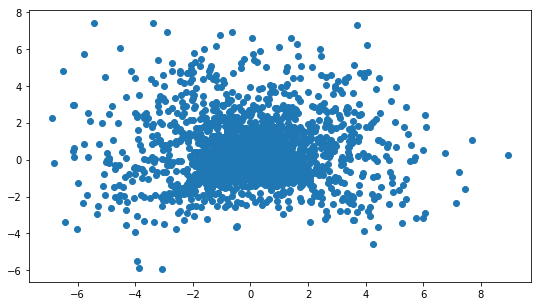

In [44]:
import matplotlib.pyplot as plt
import matplotlib

plt.figure(figsize=(9,5))
plt.scatter(result[:, 0], result[:, 1])

This isn't that useful though, so let's zoom in a bit on words we care about.

In [45]:
subset_token = []

for token, score in model1.wv.most_similar(['crime','punishment']):
    subset_token.append(token)

#for token, score in model1.wv.most_similar(['divine','holy','christ']):
#    list_token.append(token)

In [46]:
subset_token

['guilt',
 'sin',
 'offence',
 'wickedness',
 'consequence',
 'horrid',
 'truth',
 'heinousness',
 'cause',
 'suffering']

In [47]:
# pick the 100 most similar words to our chosen list
chosen_tokens = model1.most_similar(subset_token, topn=100)
chosen_tokens = [word for word, similarity in chosen_tokens]
chosen_tokens[50:75] #printing out tokens from 50 to 75

/Users/zwehrwein/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


['ends',
 'pleasures',
 'case',
 'encouragement',
 'affliction',
 'crimes',
 'covetousness',
 'opinion',
 'convinced',
 'condition',
 'villanies',
 'reformation',
 'light',
 'innocence',
 'dread',
 'offender',
 'natural',
 'necessity',
 'danger',
 'course',
 'advantage',
 'disobeying',
 'wilful',
 'state',
 'murderer']

In [48]:
# take our original two vectors
x = [model1.wv.similarity('crime', word) for word in chosen_tokens]
y = [model1.wv.similarity('punishment', word) for word in chosen_tokens]

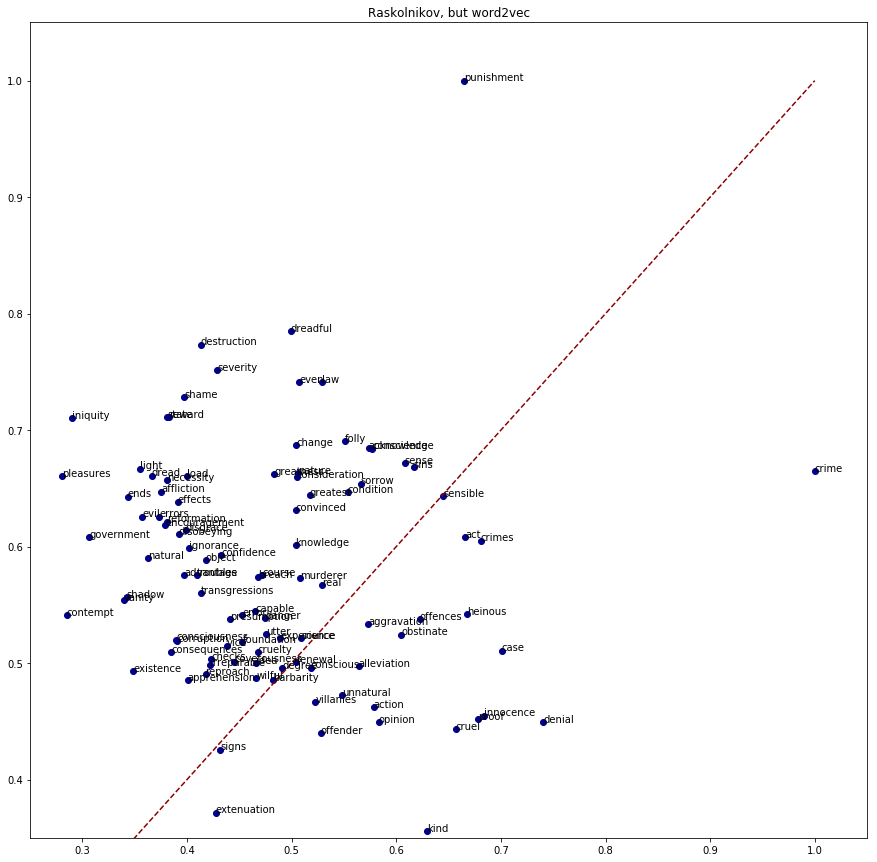

In [49]:

#tell matplotlib to make a larger plot and define our axis object

plt.figure(figsize=(15,15))


#let's scatter our terms
plt.scatter(x, y, color='darkblue')

#this for loop marches through our list of tokens and adds an annotation to each value
for i in range(len(chosen_tokens)):
    plt.annotate(chosen_tokens[i], (x[i],y[i]))

#this plot places a line splitting the vector space in two
plt.plot([0, 1], [0, 1], linestyle='--', color='darkred')

#finally, let's 'zoom in' on the plot by defining limits to our x and y axis
plt.xlim(.25,1.05)
plt.ylim(.35,1.05)

plt.title('Raskolnikov, but word2vec')

#show the plot
plt.show()

***
***
## Your turn.